In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.io import ascii
import celerite

from astropy import units as u
from astropy import constants as const
import numpy as np
from scipy.optimize import curve_fit

In [2]:
# Import lmfit to fit a guassian to each specrtrum:
from lmfit import Model, minimize, Parameters, report_fit
from lmfit.models import GaussianModel, PolynomialModel

In [27]:
# Load the 67 Data:
OHdata67 = ascii.read('C:/Users/seven/Downloads/HI119700p2800.txt', data_start=13, data_end = 167 )
vel67 = OHdata67['col1']
Ta67 = OHdata67['col2']

# Galactic range choice:
igood = np.where((vel67 >= -100) & (vel67 <= 100))
# Select Galactic range:
vel67 = vel67[igood]
Ta67 = Ta67[igood]

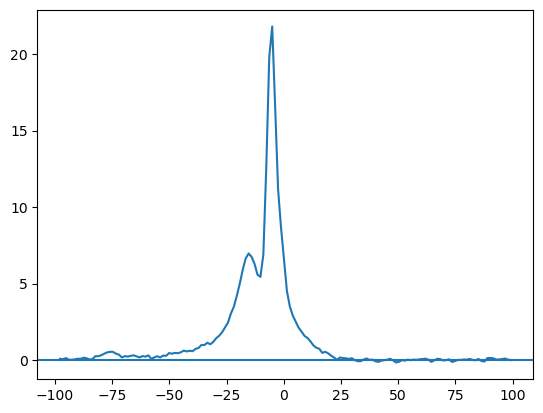

In [28]:
plt.plot(vel67, Ta67)
plt.axhline(0)

In [29]:
def Gauss(x, height, center, width,):
    y = height*np.exp(-(x-center)**2/(2*width**2))
    return y

In [30]:
parameters, covariance = curve_fit(Gauss, vel67, Ta67, p0=[0.03, 0, 4])
fitA = parameters[0]
fitB = parameters[1]
fitC = parameters[2]
fit_y = Gauss(vel67, fitA, fitB, fitC)

In [31]:
def doubleGauss(x, h1, c1, w1, h2, c2, w2,):
    G = h1*np.exp(-(x-c1)**2/(2*w1**2)) + h2*np.exp(-(x-c2)**2/(2*w2**2))
    return G

In [32]:
parametersG, covarianceG = curve_fit(doubleGauss, vel67, Ta67, p0= [7, -20, 12, 23, 0, 5])

In [33]:
parametersG

array([ 6.59303722, -9.62034201, 11.79050219, 15.62579878, -5.12954705,
        1.83868459])

In [22]:
doubleGauss(vel67, 6.59303722, -9.62034201, 11.79050219, 15.62579878, -5.12954705,
        1.83868459)

4.712748217926703e-12
1.0551830710424289e-11
2.349295157401972e-11
5.168310530375693e-11
1.1234684057337397e-10
2.413094752907372e-10
5.091850932716147e-10
1.0679034470726914e-09
2.213041425740716e-09
4.531566383244562e-09
9.168713387154035e-09


In [23]:
fit_G = doubleGauss(vel67, 6.59303722, -9.62034201, 11.79050219, 15.62579878, -5.12954705,
        1.83868459)

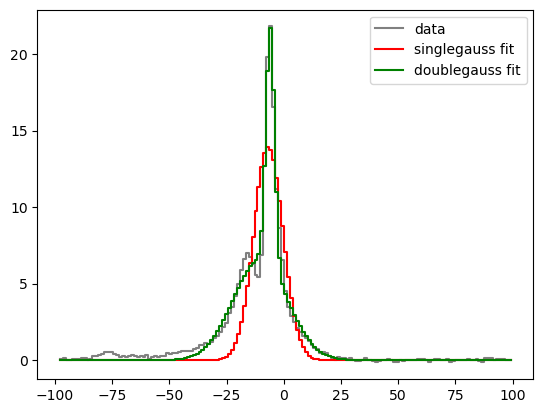

In [26]:
plt.step(vel67, Ta67, 'grey', label = 'data')
plt.step(vel67, fit_y, 'red', label = 'singlegauss fit')
plt.step(vel67, fit_G, 'green', label = 'doublegauss fit')
plt.legend()